In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
#import probscale

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#from prettytable import PrettyTable
#from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.filterwarnings('ignore')

#pip install plotly
#import plotly.express as px

In [2]:
#from google.colab import drive
#drive.mount('/content/drive/MyDrive/Curso Data Science/NPS21.xlsx')

### Dataset traido de Excel con los datos recogidos en el 2021 para el NPS telefónico, los cuales fueron cruzados con datos de CRM para obtener mayor detalles del tipo y motivo del contacto

In [9]:
df=pd.read_excel("C:/Users/vitto/NPS21.xlsx")
df.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
0,04/01/2021,09:00:33,1780.0,17676121,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,NaN,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
1,04/01/2021,09:00:33,1749.0,35244217,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,34009650,1,1.0,True,0,0
2,04/01/2021,09:00:33,3437.0,19227141,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
3,04/01/2021,09:00:33,1743.0,17649985,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
4,04/01/2021,09:00:33,1747.0,12331268,NaN,NaN,NaN,NaN,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0


In [10]:
df.columns

Index(['Fecha', 'hora', 'ID Asesor', 'DNI ASEGURADO', 'RTA1', 'RTA2', 'RTA3',
       'RTA4', 'RTA5', 'DNIS/COLA', 'NPS', 'MES', 'DNI', 'FECHA', 'DNI&FECHA',
       'Tipo de contacto', 'Motivo Gen.', 'Motivo', 'Agente', 'TL', 'C', 'R',
       'SEGMENTO', 'CIRC', 'BAJAS', 'MES NPS', 'MES BAJA', 'NPS > BAJA',
       'TOTALIDAD DE RESPUESTAS', 'ALGUNA RESPUESTA'],
      dtype='object')

In [11]:
df.duplicated().any()

True

Variables importantes a analizar= ID Asesor, las respuestas 1 a 4, NPS, mes, DNI (ver si hay repetidos en el mismo mes), Tipo de contacto, Motivo Gen., Motivo

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79049 entries, 0 to 79048
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    79049 non-null  object 
 1   hora                     79049 non-null  object 
 2   ID Asesor                78846 non-null  float64
 3   DNI ASEGURADO            79049 non-null  int64  
 4   RTA1                     29651 non-null  float64
 5   RTA2                     28952 non-null  float64
 6   RTA3                     26497 non-null  float64
 7   RTA4                     25308 non-null  float64
 8   RTA5                     94 non-null     float64
 9   DNIS/COLA                79047 non-null  object 
 10  NPS                      25307 non-null  object 
 11  MES                      79049 non-null  object 
 12  DNI                      79049 non-null  int64  
 13  FECHA                    79049 non-null  int64  
 14  DNI&FECHA             

Es un dataset con una alta cantidad de NaN en campos relacionados con las respuestas.

Hay algunos datos que deben pasarse a string para que Python no los use en cálculos (Fecha, DNI, ID Asesor, DNI Asegurado, DNI&Fecha)

In [13]:
df['ID Asesor']=df['ID Asesor'].astype(str)
df['DNI']=df['DNI'].astype(str)
df['FECHA']=df['FECHA'].astype(str)
df['DNI ASEGURADO']=df['DNI ASEGURADO'].astype(str)
df['DNI&FECHA']=df['DNI&FECHA'].astype(str)
df['Tipo de contacto']=df['Tipo de contacto'].astype(str)
df['Motivo Gen.']=df['Motivo Gen.'].astype(str)
df['Motivo']=df['Motivo'].astype(str)

In [14]:
df.MES[df['MES']=="Enero"] = 1
df.MES[df['MES']=="Febrero"] = 2
df.MES[df['MES']=="Marzo"] = 3
df.MES[df['MES']=="Abril"] = 4
df.MES[df['MES']=="Mayo"] = 5
df.MES[df['MES']=="Junio"] = 6
df.MES[df['MES']=="Julio"] = 7
df.MES[df['MES']=="Agosto"] = 8
df.MES[df['MES']=="Septiembre"] = 9
df.MES[df['MES']=="Octubre"] = 10
df.MES[df['MES']=="Noviembre"] = 11
df.MES[df['MES']=="Diciembre"] = 12

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79049 entries, 0 to 79048
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    79049 non-null  object 
 1   hora                     79049 non-null  object 
 2   ID Asesor                79049 non-null  object 
 3   DNI ASEGURADO            79049 non-null  object 
 4   RTA1                     29651 non-null  float64
 5   RTA2                     28952 non-null  float64
 6   RTA3                     26497 non-null  float64
 7   RTA4                     25308 non-null  float64
 8   RTA5                     94 non-null     float64
 9   DNIS/COLA                79047 non-null  object 
 10  NPS                      25307 non-null  object 
 11  MES                      79049 non-null  object 
 12  DNI                      79049 non-null  object 
 13  FECHA                    79049 non-null  object 
 14  DNI&FECHA             

In [17]:
da=df

In [18]:
da['Tipo de contacto'].head(3)

0          nan
1    Solicitud
2            -
Name: Tipo de contacto, dtype: object

En el caso del NPS, el valor promedio de respuesta es 7, lo cual indicaría un valor "neutro" con una desviación estandard de +-4, lo cual es elevado debido al tamaño de la muestra.
El valor máximo muestra que para la respuesta 4 es "18", lo cual no tiene sentido porque el NPS se evalua del 0 al 10.  Se deben revisar los outliers y descartar dichos valores (deberían ser pocos casos)

## Creamos un dataset donde se limpia cada respuesta

In [19]:
df1=df[df['RTA1'].notnull() ]   # Grado de Satisfacción
df2=df[df['RTA2'].notnull() ]   # Facil comprensión de la póliza
df3=df[df['RTA3'].notnull() ]   # Se resolvió en el tiempo acordado?
df4=df[df['RTA4'].notnull() ]   # NPS (recomendación)

## Hacemos un Label Encoder para pasar variables categóricas a numéricas

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Tipo de contacto']= label_encoder.fit_transform(df['Tipo de contacto'])
df['Motivo Gen.']= label_encoder.fit_transform(df['Motivo Gen.'])
df['Motivo']= label_encoder.fit_transform(df['Motivo'])
df.head(5)

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
0,04/01/2021,09:00:33,1780.0,17676121,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,NaN,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
1,04/01/2021,09:00:33,1749.0,35244217,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,34009650,1,1.0,True,0,0
2,04/01/2021,09:00:33,3437.0,19227141,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
3,04/01/2021,09:00:33,1743.0,17649985,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
4,04/01/2021,09:00:33,1747.0,12331268,NaN,NaN,NaN,NaN,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0


Tipo de contacto:

- 0= -
- 1= 0
- 2= Consulta
- 3= Denuncia
- 4= Orden de trabajo
- 5= Reclamo
- 6= Registración de contacto
- 7= Solicitud
- 8= Vacío

## Cremos un dataset sin NaN

In [21]:
dfc=df[df['RTA1'].notnull() & df['RTA2'].notnull() & df['RTA3'].notnull() & df['RTA4'].notnull()]  #eliminando casos donde hay respuestas NaN
dfc.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
15,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
16,04/01/2021,09:00:33,1738.0,14225547,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
17,04/01/2021,09:00:33,1737.0,27387328,10.0,10.0,2.0,0.0,NaN,SOCIO 8,...,NaN,Retención,CUSTOMER,NaN,NaN,1,NaN,False,1,1
18,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
23,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,38273787,1,1.0,True,1,1


In [22]:
dfc.describe().round()

,RTA1,RTA2,RTA3,RTA4,RTA5,Tipo de contacto,Motivo Gen.,Motivo,MES NPS,MES BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
count,19759.0,19759.0,19759.0,19759.0,36.0,19759.0,19759.0,19759.0,19759.0,6119.0,19759.0,19759.0
mean,9.0,8.0,1.0,7.0,9.0,5.0,36.0,76.0,6.0,6.0,1.0,1.0
std,3.0,3.0,0.0,3.0,1.0,3.0,28.0,52.0,3.0,3.0,0.0,0.0
min,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
25%,9.0,8.0,1.0,5.0,10.0,2.0,6.0,25.0,3.0,4.0,1.0,1.0
50%,10.0,10.0,1.0,9.0,10.0,6.0,47.0,86.0,6.0,6.0,1.0,1.0
75%,10.0,10.0,1.0,10.0,10.0,8.0,67.0,132.0,9.0,9.0,1.0,1.0
max,10.0,10.0,2.0,18.0,10.0,9.0,68.0,147.0,12.0,12.0,1.0,1.0


In [23]:
dfc.corr()

,RTA1,RTA2,RTA3,RTA4,RTA5,Tipo de contacto,Motivo Gen.,Motivo,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
RTA1,1.000000,0.592172,-0.616078,0.580275,0.703928,-0.009464,-0.032118,-0.025464,0.011320,-0.002064,-0.004554,NaN,NaN
RTA2,0.592172,1.000000,-0.429619,0.524098,0.615094,-0.036400,-0.033249,-0.017602,-0.004251,-0.009685,-0.040506,NaN,NaN
RTA3,-0.616078,-0.429619,1.000000,-0.457676,-0.702643,-0.059661,0.035955,0.024091,-0.016179,-0.011937,-0.066274,NaN,NaN
RTA4,0.580275,0.524098,-0.457676,1.000000,0.677404,-0.044806,-0.035551,-0.015691,0.012659,-0.004941,-0.065635,NaN,NaN
RTA5,0.703928,0.615094,-0.702643,0.677404,1.000000,-0.088319,0.020126,-0.077154,-0.050229,-0.073857,0.083588,NaN,NaN
Tipo de contacto,-0.009464,-0.036400,-0.059661,-0.044806,-0.088319,1.000000,0.114840,0.409443,0.032221,0.056642,0.283380,NaN,NaN
Motivo Gen.,-0.032118,-0.033249,0.035955,-0.035551,0.020126,0.114840,1.000000,0.478459,-0.041981,-0.051180,-0.105210,NaN,NaN
Motivo,-0.025464,-0.017602,0.024091,-0.015691,-0.077154,0.409443,0.478459,1.000000,-0.080238,-0.037075,-0.011535,NaN,NaN
MES NPS,0.011320,-0.004251,-0.016179,0.012659,-0.050229,0.032221,-0.041981,-0.080238,1.000000,0.844947,0.238788,NaN,NaN
MES BAJA,-0.002064,-0.009685,-0.011937,-0.004941,-0.073857,0.056642,-0.051180,-0.037075,0.844947,1.000000,-0.161203,NaN,NaN


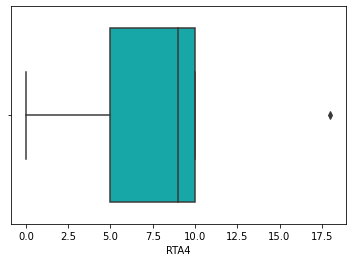

In [24]:
ax=sns.boxplot(x='RTA4', data=dfc, color='c')

Se puede apreciar que hay un clienteque en la respuesta 4 se cargó el valor 18 (error de tipeo en el archivo).  Se puede eliminar este dato del dataset ya que no aporta información valiosa

## Limpieza Outliers

In [25]:
filtro=dfc['RTA4'] > 11
dfc[filtro]

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
28348,05/05/2021,09:00:33,2217.0,15301701,9.0,8.0,1.0,18.0,NaN,SOCIO 6,...,NaN,NaN,CUSTOMER,0,NaN,5,NaN,False,1,1


La fila a limpiar en el dataset es la 28348 porque contiene un valor atípico, debido posiblemente a un problema de tipeo del dato

In [26]:
dfcf = dfc.drop(dfc[dfc['RTA4']>11].index)
dfcf.head(5)

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
15,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
16,04/01/2021,09:00:33,1738.0,14225547,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
17,04/01/2021,09:00:33,1737.0,27387328,10.0,10.0,2.0,0.0,NaN,SOCIO 8,...,NaN,Retención,CUSTOMER,NaN,NaN,1,NaN,False,1,1
18,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
23,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,38273787,1,1.0,True,1,1


In [27]:
dfcf.shape

(19758, 30)

df_clean['RTA1']=df_clean['RTA1'].astype(str)
df_clean['RTA2']=df_clean['RTA2'].astype(str)
df_clean['RTA3']=df_clean['RTA3'].astype(str)
df_clean['RTA4']=df_clean['RTA4'].astype(str)
df_clean['RTA5']=df_clean['RTA5'].astype(str)

In [28]:
dfmotivo = da
dfmotivo

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
0,04/01/2021,09:00:33,1780.0,17676121,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,NaN,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
1,04/01/2021,09:00:33,1749.0,35244217,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,34009650,1,1.0,True,0,0
2,04/01/2021,09:00:33,3437.0,19227141,NaN,NaN,NaN,NaN,NaN,SOCIO 5,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
3,04/01/2021,09:00:33,1743.0,17649985,NaN,NaN,NaN,NaN,NaN,SOCIO 7,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
4,04/01/2021,09:00:33,1747.0,12331268,NaN,NaN,NaN,NaN,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79044,31/12/2021,09:00:33,1749.0,22907259,NaN,NaN,NaN,NaN,NaN,SOCIO 8,...,NaN,NaN,CUSTOMER,NaN,Musimundo - EMSA,12,NaN,True,0,0
79045,31/12/2021,09:00:33,1780.0,17551877,9.0,9.0,NaN,NaN,NaN,SOCIO 8,...,NaN,NaN,CUSTOMER,0,Electrónica Megatone S.A - EMSA,12,NaN,True,0,1
79046,31/12/2021,09:00:33,2255.0,37594300,NaN,NaN,NaN,NaN,NaN,SOCIO 8,...,NaN,NaN,CUSTOMER,0,Cardif Servicios S.A.,12,NaN,True,0,0
79047,31/12/2021,09:00:33,5798.0,13703233,NaN,NaN,NaN,NaN,NaN,SOCIO 3,...,NaN,NaN,CUSTOMER,0,Electrónica Megatone S.A - EMSA,12,NaN,True,0,0


In [29]:
dfmotivo['Tipo de contacto'].head(3)

0    9
1    8
2    0
Name: Tipo de contacto, dtype: int32

In [30]:
dfmotivo['ID Asesor']=dfmotivo['ID Asesor'].astype(str)
dfmotivo['DNI']=dfmotivo['DNI'].astype(str)
dfmotivo['FECHA']=dfmotivo['FECHA'].astype(str)
dfmotivo['DNI ASEGURADO']=dfmotivo['DNI ASEGURADO'].astype(str)
dfmotivo['DNI&FECHA']=dfmotivo['DNI&FECHA'].astype(str)
dfmotivo['Tipo de contacto']=dfmotivo['Tipo de contacto'].astype(str)
dfmotivo['Motivo Gen.']=dfmotivo['Motivo Gen.'].astype(str)
dfmotivo['Motivo']=dfmotivo['Motivo'].astype(str)

In [31]:
dfmotivo.MES[dfmotivo['MES']=="Enero"] = 1
dfmotivo.MES[dfmotivo['MES']=="Febrero"] = 2
dfmotivo.MES[dfmotivo['MES']=="Marzo"] = 3
dfmotivo.MES[dfmotivo['MES']=="Abril"] = 4
dfmotivo.MES[dfmotivo['MES']=="Mayo"] = 5
dfmotivo.MES[dfmotivo['MES']=="Junio"] = 6
dfmotivo.MES[dfmotivo['MES']=="Julio"] = 7
dfmotivo.MES[dfmotivo['MES']=="Agosto"] = 8
dfmotivo.MES[dfmotivo['MES']=="Septiembre"] = 9
dfmotivo.MES[dfmotivo['MES']=="Octubre"] = 10
dfmotivo.MES[dfmotivo['MES']=="Noviembre"] = 11
dfmotivo.MES[dfmotivo['MES']=="Diciembre"] = 12

In [32]:
dfmotivof=dfmotivo[dfmotivo['RTA1'].notnull() & dfmotivo['RTA2'].notnull() & dfmotivo['RTA3'].notnull() & dfmotivo['RTA4'].notnull()]  #eliminando casos donde hay respuestas NaN
dfmotivof.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
15,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
16,04/01/2021,09:00:33,1738.0,14225547,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
17,04/01/2021,09:00:33,1737.0,27387328,10.0,10.0,2.0,0.0,NaN,SOCIO 8,...,NaN,Retención,CUSTOMER,NaN,NaN,1,NaN,False,1,1
18,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
23,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,38273787,1,1.0,True,1,1


In [33]:
dfmotivoff = dfmotivof.drop(dfmotivof[dfmotivof['RTA4']>11].index)
dfmotivoff.head(5)

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
15,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
16,04/01/2021,09:00:33,1738.0,14225547,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
17,04/01/2021,09:00:33,1737.0,27387328,10.0,10.0,2.0,0.0,NaN,SOCIO 8,...,NaN,Retención,CUSTOMER,NaN,NaN,1,NaN,False,1,1
18,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
23,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,Cancelación,Cancelación,CUSTOMER,NaN,38273787,1,1.0,True,1,1


In [34]:
filtroDNIf=dfmotivoff[dfmotivoff['DNI']=='14976998']
filtroDNIf.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA


In [35]:
dfmotivoff['Tipo de contacto'].head(3)

15    8
16    2
17    8
Name: Tipo de contacto, dtype: object

In [37]:
#filtroDNIf.to_excel(r'C:\Vision\File Name.xlsx', index = False)

In [39]:
#DNImayor=pd.crosstab(index=filtroDNIf['Tipo de contacto'], columns=filtroDNIf['MES'], margins=True, )
#DNImayor

## Con el dataset limpio vemos histogramas de cada respuesta

Text(0, 0.5, 'Frecuencia de Calificaciones')

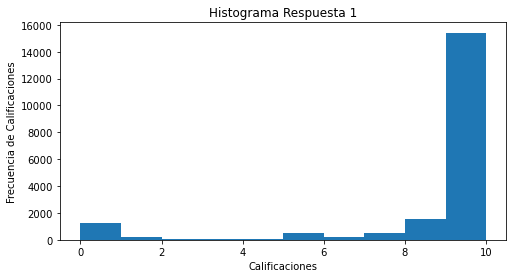

In [40]:
fig, ax=plt.subplots(figsize=(8,4))
ax.hist(dfcf['RTA1'],bins=10)
ax.set_title('Histograma Respuesta 1')
ax.set_xlabel('Calificaciones')
ax.set_ylabel('Frecuencia de Calificaciones')

Text(0, 0.5, 'Frecuencia de Calificaciones')

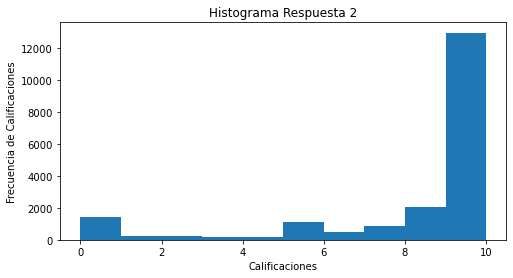

In [41]:
fig, ax=plt.subplots(figsize=(8,4))
ax.hist(dfcf['RTA2'],bins=10)
ax.set_title('Histograma Respuesta 2')
ax.set_xlabel('Calificaciones')
ax.set_ylabel('Frecuencia de Calificaciones')

Text(0, 0.5, 'Frecuencia de Calificaciones')

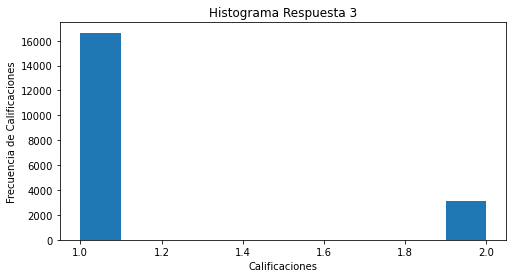

In [42]:
fig, ax=plt.subplots(figsize=(8,4))
ax.hist(dfcf['RTA3'],bins=10)
ax.set_title('Histograma Respuesta 3')
ax.set_xlabel('Calificaciones')
ax.set_ylabel('Frecuencia de Calificaciones')

Text(0, 0.5, 'Frecuencia de Calificaciones')

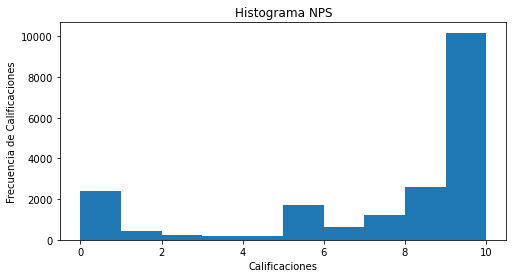

In [43]:
fig, ax=plt.subplots(figsize=(8,4))
ax.hist(dfcf['RTA4'],bins=10)
ax.set_title('Histograma NPS')
ax.set_xlabel('Calificaciones')
ax.set_ylabel('Frecuencia de Calificaciones')

La mayor concentración de respuestas están en 10, un segundo grupo se ubica entre las calificaciones 0, 8, 9; y un tercer grupo en 5.
Se vuelve a destacar que debe haber un valor fuera de rango, ya que la escala del gráfico debería llegar hasta 10.

## Gráficos de barra

In [44]:
def df_explore(dfcf):
    print('Shape: ', dfcf.shape)
    
    t=['Columns','Type','Non-Null','Null','Unique','Example']
    
    for c in df.columns:
        t.add_row([c,
                  dfcf[c].dtype,
                  len(dfcf[c])-np.sum(dfcf[c].isna()),
                  np.sum(dfcf[c].isna()),
                   np.count_nonzero(dfcf[c],unique()),
                   dfcf[~dfcf[c].isnull()][c].iloc[0],
                   ])
        print(t)
        print()
        return
    
    df_explore(dfcf)

In [45]:
def column_exploration(dfcf,column_name,sort_index=False):
    #Analysis of column values and plot
    print(f'COLUMN: {column_name}')

    # Quantity and Percentage of orders
    print('\n\na. Quantity and Percentage \n')
    abs_values =dfcf[column_name].value_counts()
    prc_values =(dfcf[column_name].value_counts(normalize=True)*100).apply(lambda x:round(x,1))
    df_values = pd.merge(abs_values, prc_values, left_index=True, right_index=True, suffixes=('_abs','_prc'))
    #display(df_values)

    # Plot of orders
    #print('\n\nb. Plot of quantity\n')
    
    if sort_index is True:
        df_values = df_values.sort_index(axis = 0)
    
    # Plot values, title and axis names
    ax = df_values[column_name+'_abs'].plot(kind='bar', figsize=(15,7))
    ax.set_title(f"Cantidad by {column_name}")
    ax.set_xlabel(column_name)
    ax.set_ylabel('Cantidad')

    #Labels over bars
    rects = ax.patches
    labels = [f'{p}%' for p in df_values[column_name+'_prc'].to_list()]
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom')
    
    return


COLUMN: NPS


a. Quantity and Percentage 



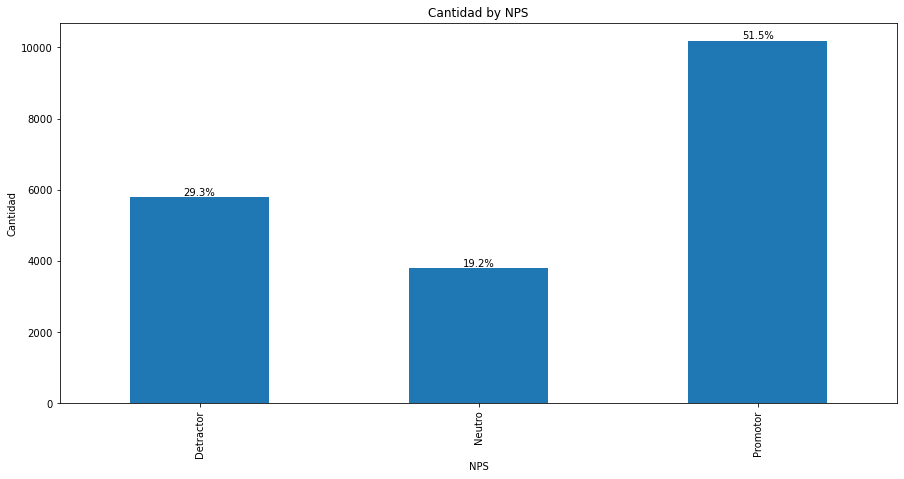

In [46]:
column_exploration(dfcf,'NPS', True)

COLUMN: RTA4


a. Quantity and Percentage 



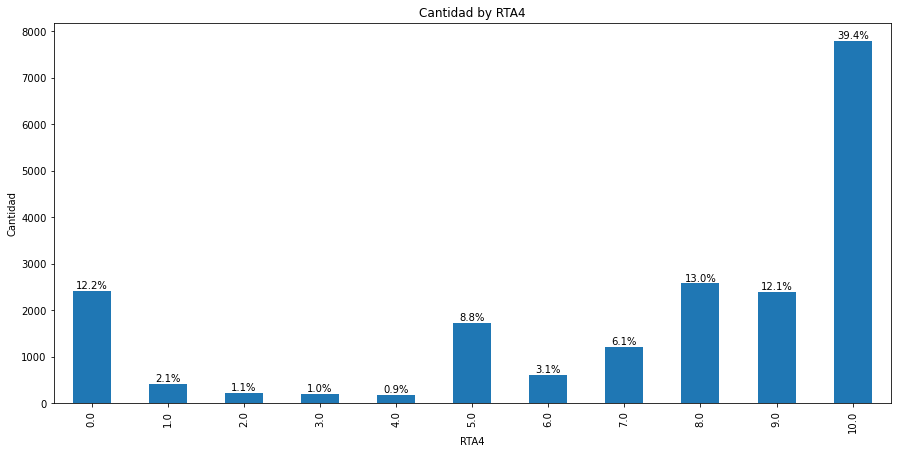

In [47]:
column_exploration(dfcf,'RTA4',True)

Hay una mayor concentración de clientes que responden a la pregunta 4 con 10, y también a la pregunta 1 (simultaneamente)

## Cruce de variables Rta4 y Mes

In [48]:
crosstab2=pd.crosstab(index=dfcf['RTA4'], columns=dfc['MES'])
crosstab2

MES,1,2,3,4,5,6,7,8,9,10,11,12
RTA4,,,,,,,,,,,,
0.0,210,189,257,196,212,210,165,194,221,225,188,151
1.0,40,25,34,40,36,37,26,30,50,40,37,26
2.0,19,21,19,20,14,24,19,16,18,25,16,14
3.0,6,24,32,15,11,13,9,11,16,28,15,14
4.0,13,20,15,16,19,10,8,20,21,16,9,15
5.0,155,113,177,130,140,143,153,136,157,153,149,127
6.0,41,50,54,55,47,41,44,57,65,64,53,39
7.0,123,111,122,93,81,97,85,111,118,95,92,86
8.0,201,189,285,216,195,218,179,231,210,221,234,199


In [49]:
crosstab21=pd.crosstab(index=dfcf['RTA4'], columns=dfc['MES'], normalize=True)
crosstab21*100

MES,1,2,3,4,5,6,7,8,9,10,11,12
RTA4,,,,,,,,,,,,
0.0,1.062861,0.956575,1.300739,0.992003,1.072983,1.062861,0.835105,0.981881,1.118534,1.138779,0.951513,0.764247
1.0,0.202450,0.126531,0.172082,0.202450,0.182205,0.187266,0.131592,0.151837,0.253062,0.202450,0.187266,0.131592
2.0,0.096164,0.106286,0.096164,0.101225,0.070857,0.121470,0.096164,0.080980,0.091102,0.126531,0.080980,0.070857
3.0,0.030367,0.121470,0.161960,0.075919,0.055674,0.065796,0.045551,0.055674,0.080980,0.141715,0.075919,0.070857
4.0,0.065796,0.101225,0.075919,0.080980,0.096164,0.050612,0.040490,0.101225,0.106286,0.080980,0.045551,0.075919
5.0,0.784492,0.571920,0.895840,0.657961,0.708574,0.723757,0.774370,0.688329,0.794615,0.774370,0.754125,0.642778
6.0,0.207511,0.253062,0.273307,0.278368,0.237878,0.207511,0.222695,0.288491,0.328981,0.323919,0.268246,0.197388
7.0,0.622533,0.561798,0.617471,0.470695,0.409961,0.490940,0.430205,0.561798,0.597226,0.480818,0.465634,0.435267
8.0,1.017309,0.956575,1.442454,1.093228,0.986942,1.103351,0.905962,1.169147,1.062861,1.118534,1.184330,1.007187


<AxesSubplot:xlabel='MES', ylabel='RTA4'>

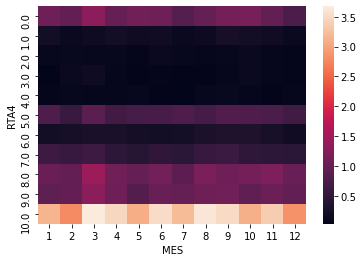

In [50]:
sns.heatmap(crosstab21*100)

El mismo cruce se hizo por mes para la respuesta 4, y el outlier se encuentra en Mayo

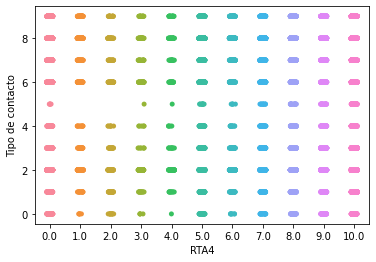

In [51]:
ax=sns.stripplot(x='RTA4', y='Tipo de contacto', data=dfcf)
plt.ylabel('Tipo de contacto')
plt.show()

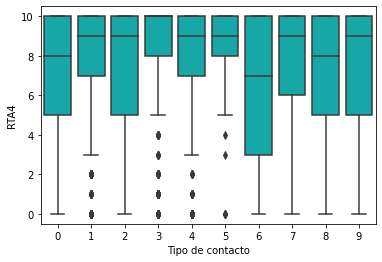

In [52]:
ax=sns.boxplot(y='RTA4', x='Tipo de contacto', data=dfcf, color='c')

## Cruce de variables Rta1 y Rta4

In [53]:
crosstab=pd.crosstab(index=dfc['RTA1'], columns=dfc['RTA4'])
crosstab

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,18.0
RTA1,,,,,,,,,,,,
0.0,1024,28,29,23,11,58,10,6,14,4,31,0
1.0,53,33,6,7,1,11,4,4,13,10,31,0
2.0,30,9,13,4,2,8,4,0,4,3,5,0
3.0,20,5,2,4,5,6,1,2,6,2,6,0
4.0,7,7,6,6,8,10,5,2,3,2,1,0
5.0,119,18,33,24,25,175,25,30,26,11,20,0
6.0,39,9,8,9,13,49,47,24,18,6,8,0
7.0,65,13,12,16,18,99,65,125,48,12,15,0
8.0,104,28,33,26,24,279,115,257,448,132,67,0


## Cruce de variables Rta4 y Tipo de contacto

In [55]:
crosstab3=pd.crosstab(index=dfcf['RTA4'], columns=dfcf['Tipo de contacto'])
crosstab3

Tipo de contacto,0,1,2,3,4,5,6,7,8,9
RTA4,,,,,,,,,,
0.0,55,132,680,110,48,5,405,208,485,290
1.0,5,17,125,28,12,0,57,35,94,48
2.0,10,24,58,17,7,0,30,22,38,19
3.0,4,13,53,7,6,1,31,20,41,18
4.0,1,10,62,11,5,1,22,18,31,21
5.0,28,87,435,124,33,10,280,142,445,149
6.0,7,31,161,51,12,5,74,55,162,52
7.0,18,73,312,97,35,11,132,124,293,119
8.0,39,183,598,261,83,20,271,236,666,221


In [56]:
crosstab31=pd.crosstab(index=dfcf['RTA4'], columns=dfcf['Tipo de contacto'], normalize='index')
crosstab31*100

Tipo de contacto,0,1,2,3,4,5,6,7,8,9
RTA4,,,,,,,,,,
0.0,2.274607,5.459057,28.122415,4.549214,1.985112,0.206782,16.749380,8.602151,20.057899,11.993383
1.0,1.187648,4.038005,29.691211,6.650831,2.850356,0.000000,13.539192,8.313539,22.327791,11.401425
2.0,4.444444,10.666667,25.777778,7.555556,3.111111,0.000000,13.333333,9.777778,16.888889,8.444444
3.0,2.061856,6.701031,27.319588,3.608247,3.092784,0.515464,15.979381,10.309278,21.134021,9.278351
4.0,0.549451,5.494505,34.065934,6.043956,2.747253,0.549451,12.087912,9.890110,17.032967,11.538462
5.0,1.615695,5.020196,25.100981,7.155222,1.904212,0.577034,16.156953,8.193883,25.678015,8.597807
6.0,1.147541,5.081967,26.393443,8.360656,1.967213,0.819672,12.131148,9.016393,26.557377,8.524590
7.0,1.482702,6.013180,25.700165,7.990115,2.883031,0.906096,10.873147,10.214168,24.135091,9.802306
8.0,1.512801,7.098526,23.196276,10.124127,3.219550,0.775795,10.512025,9.154383,25.833980,8.572537


In [57]:
crosstab311=pd.crosstab(index=dfcf['RTA4'], columns=dfcf['Tipo de contacto'], normalize='columns')
crosstab311*100

Tipo de contacto,0,1,2,3,4,5,6,7,8,9
RTA4,,,,,,,,,,
0.0,16.566265,9.153953,13.299433,5.595117,8.163265,3.378378,20.280421,11.460055,10.835567,15.417331
1.0,1.506024,1.178918,2.444749,1.424212,2.040816,0.000000,2.854281,1.928375,2.100089,2.551834
2.0,3.012048,1.664355,1.134363,0.864700,1.190476,0.000000,1.502253,1.212121,0.848972,1.010101
3.0,1.204819,0.901526,1.036573,0.356053,1.020408,0.675676,1.552328,1.101928,0.915996,0.956938
4.0,0.301205,0.693481,1.212595,0.559512,0.850340,0.675676,1.101652,0.991736,0.692583,1.116427
5.0,8.433735,6.033287,8.507725,6.307223,5.612245,6.756757,14.021032,7.823691,9.941912,7.921318
6.0,2.108434,2.149792,3.148836,2.594100,2.040816,3.378378,3.705558,3.030303,3.619303,2.764487
7.0,5.421687,5.062413,6.102093,4.933876,5.952381,7.432432,6.609915,6.831956,6.546023,6.326422
8.0,11.746988,12.690707,11.695678,13.275687,14.115646,13.513514,13.570356,13.002755,14.879357,11.749070


In [58]:
dfcf['ID Asesor'].unique()

array(['1744.0', '1738.0', '1737.0', '1746.0', '3437.0', '1780.0',
       '5684.0', '1749.0', '1743.0', '1747.0', '5798.0', '2039.0',
       '3541.0', '2188.0', '1801.0', '1824.0', '1795.0', '1866.0',
       '1754.0', '2037.0', '1755.0', '1771.0', '1802.0', '1748.0',
       '2209.0', '1779.0', '1661.0', '1993.0', '1791.0', '2210.0',
       '1595.0', '2217.0', '1742.0', '1782.0', '2205.0', '2255.0',
       '2256.0', '1751.0', '1786.0', '2372.0', '2371.0', '2373.0',
       '2370.0', '2369.0', '2380.0', '2382.0', '2379.0', '2383.0',
       '6377.0'], dtype=object)

In [59]:
dfcf['NPS'].unique()

array(['Detractor', 'Promotor', 'Neutro'], dtype=object)

In [60]:
corrmat=dfcf.corr()
corrmat

,RTA1,RTA2,RTA3,RTA4,RTA5,Tipo de contacto,Motivo Gen.,Motivo,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
RTA1,1.000000,0.592172,-0.616078,0.580400,0.703928,-0.009458,-0.032125,-0.025466,0.011322,-0.002064,-0.004550,NaN,NaN
RTA2,0.592172,1.000000,-0.429622,0.524234,0.615094,-0.036403,-0.033248,-0.017601,-0.004252,-0.009685,-0.040508,NaN,NaN
RTA3,-0.616078,-0.429622,1.000000,-0.457723,-0.702643,-0.059685,0.035978,0.024097,-0.016188,-0.011937,-0.066290,NaN,NaN
RTA4,0.580400,0.524234,-0.457723,1.000000,0.677404,-0.044656,-0.035718,-0.015736,0.012730,-0.004941,-0.065542,NaN,NaN
RTA5,0.703928,0.615094,-0.702643,0.677404,1.000000,-0.088319,0.020126,-0.077154,-0.050229,-0.073857,0.083588,NaN,NaN
Tipo de contacto,-0.009458,-0.036403,-0.059685,-0.044656,-0.088319,1.000000,0.114897,0.409468,0.032200,0.056642,0.283355,NaN,NaN
Motivo Gen.,-0.032125,-0.033248,0.035978,-0.035718,0.020126,0.114897,1.000000,0.478458,-0.041961,-0.051180,-0.105179,NaN,NaN
Motivo,-0.025466,-0.017601,0.024097,-0.015736,-0.077154,0.409468,0.478458,1.000000,-0.080233,-0.037075,-0.011526,NaN,NaN
MES NPS,0.011322,-0.004252,-0.016188,0.012730,-0.050229,0.032200,-0.041961,-0.080233,1.000000,0.844947,0.238778,NaN,NaN
MES BAJA,-0.002064,-0.009685,-0.011937,-0.004941,-0.073857,0.056642,-0.051180,-0.037075,0.844947,1.000000,-0.161203,NaN,NaN


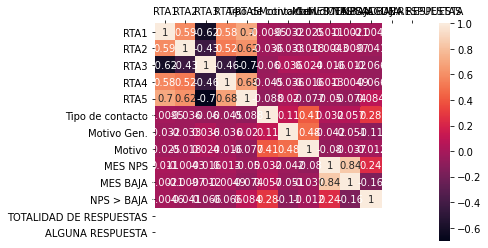

In [61]:
sns.heatmap(corrmat, vmax=1, square=False, annot=True).xaxis.tick_top()

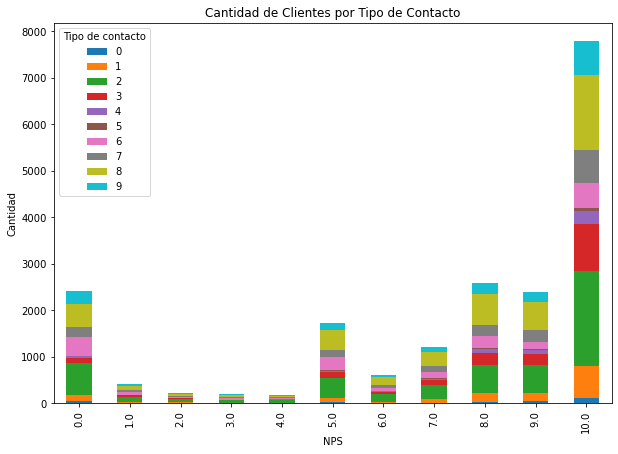

In [62]:
ax=pd.crosstab(index=dfcf['RTA4'], columns=dfcf['Tipo de contacto']).plot(kind='bar', stacked=True, figsize=(10,7))
ax.set_title('Cantidad de Clientes por Tipo de Contacto')
ax.set_xlabel('NPS')
ax.set_ylabel('Cantidad')
rects=ax.patches
labels=['{p}%']

<AxesSubplot:xlabel='RTA4', ylabel='RTA1'>

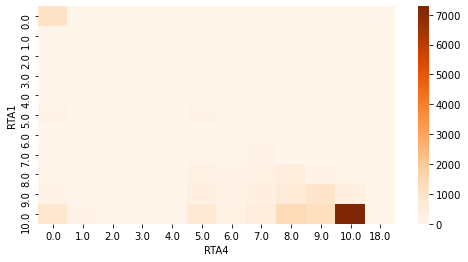

In [63]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,4
sns.heatmap(crosstab, cmap='Oranges')

<AxesSubplot:xlabel='MES', ylabel='RTA4'>

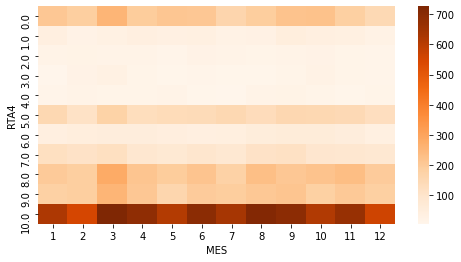

In [64]:
sns.heatmap(crosstab2, cmap='Oranges')

<AxesSubplot:xlabel='Tipo de contacto', ylabel='RTA4'>

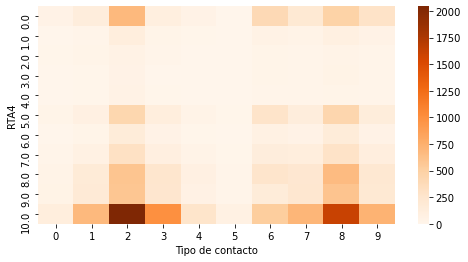

In [65]:
sns.heatmap(crosstab3, cmap='Oranges')

<AxesSubplot:xlabel='RTA1', ylabel='RTA4'>

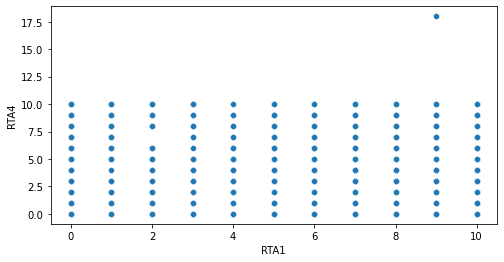

In [66]:
sns.scatterplot(x='RTA1', y='RTA4', data=dfc)

<AxesSubplot:xlabel='Tipo de contacto', ylabel='RTA4'>

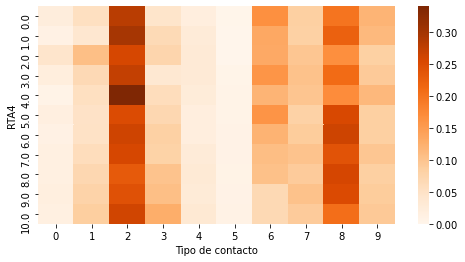

In [67]:
sns.heatmap(crosstab31, cmap='Oranges')

<AxesSubplot:xlabel='Tipo de contacto', ylabel='RTA4'>

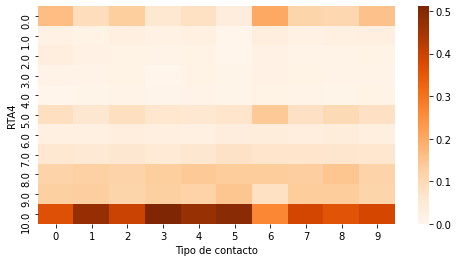

In [68]:
sns.heatmap(crosstab311, cmap='Oranges')

## Análisis por asesor comercial

In [69]:
crosstab4=pd.crosstab(index=dfcf['ID Asesor'], columns=dfcf['RTA4'])
crosstab4

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
ID Asesor,,,,,,,,,,,
1595.0,0,0,0,0,0,0,0,0,0,0,2
1661.0,0,0,0,0,0,0,0,0,0,0,7
1737.0,58,15,7,4,1,56,14,34,75,56,202
1738.0,119,19,11,10,7,81,44,51,148,129,399
1742.0,0,0,0,0,0,0,0,1,0,1,1
1743.0,144,23,11,9,5,72,28,58,124,126,415
1744.0,87,20,7,5,9,71,21,51,93,70,275
1746.0,47,14,13,5,3,47,10,24,65,39,158
1747.0,160,14,12,15,11,84,23,60,117,102,332


In [70]:
crosstab5=pd.crosstab(index=dfcf['ID Asesor'], columns=dfcf['RTA4'], margins=True, )
crosstab5

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
ID Asesor,,,,,,,,,,,,
1595.0,0,0,0,0,0,0,0,0,0,0,2,2
1661.0,0,0,0,0,0,0,0,0,0,0,7,7
1737.0,58,15,7,4,1,56,14,34,75,56,202,522
1738.0,119,19,11,10,7,81,44,51,148,129,399,1018
1742.0,0,0,0,0,0,0,0,1,0,1,1,3
1743.0,144,23,11,9,5,72,28,58,124,126,415,1015
1744.0,87,20,7,5,9,71,21,51,93,70,275,709
1746.0,47,14,13,5,3,47,10,24,65,39,158,425
1747.0,160,14,12,15,11,84,23,60,117,102,332,930


In [71]:
crosstab5.sort_values('All',ascending=False).head(15)    # los que contestaron más encuestas

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
ID Asesor,,,,,,,,,,,,
All,2418,421,225,194,182,1733,610,1214,2578,2393,7790,19758
1749.0,113,23,11,11,13,90,40,72,160,169,496,1198
2039.0,171,17,19,12,9,116,31,71,159,136,449,1190
3437.0,82,25,10,6,8,88,31,53,117,118,506,1044
1780.0,154,26,9,14,14,97,33,57,129,136,375,1044
1738.0,119,19,11,10,7,81,44,51,148,129,399,1018
1743.0,144,23,11,9,5,72,28,58,124,126,415,1015
2037.0,129,17,15,12,12,84,32,58,126,100,349,934
1747.0,160,14,12,15,11,84,23,60,117,102,332,930


In [72]:
crosstab51=pd.crosstab(index=dfcf['ID Asesor'], columns=dfcf['RTA4'], normalize='index')
crosstab51

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
ID Asesor,,,,,,,,,,,
1595.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1661.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1737.0,0.111111,0.028736,0.013410,0.007663,0.001916,0.107280,0.026820,0.065134,0.143678,0.107280,0.386973
1738.0,0.116896,0.018664,0.010806,0.009823,0.006876,0.079568,0.043222,0.050098,0.145383,0.126719,0.391945
1742.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333
1743.0,0.141872,0.022660,0.010837,0.008867,0.004926,0.070936,0.027586,0.057143,0.122167,0.124138,0.408867
1744.0,0.122708,0.028209,0.009873,0.007052,0.012694,0.100141,0.029619,0.071932,0.131171,0.098731,0.387870
1746.0,0.110588,0.032941,0.030588,0.011765,0.007059,0.110588,0.023529,0.056471,0.152941,0.091765,0.371765
1747.0,0.172043,0.015054,0.012903,0.016129,0.011828,0.090323,0.024731,0.064516,0.125806,0.109677,0.356989


<AxesSubplot:xlabel='RTA4', ylabel='ID Asesor'>

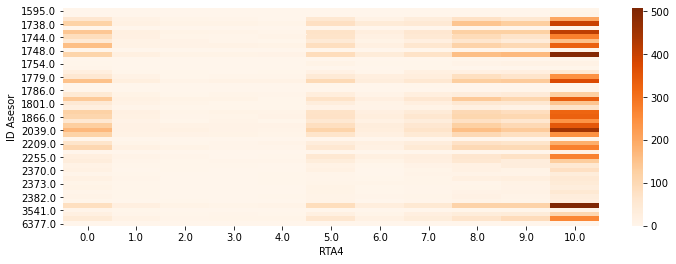

In [73]:
rcParams['figure.figsize']=12,4
sns.heatmap(crosstab4, cmap='Oranges')

In [74]:
#rcParams['figure.figsize']=12,4
#sns.heatmap(crosstab41, cmap='Oranges')

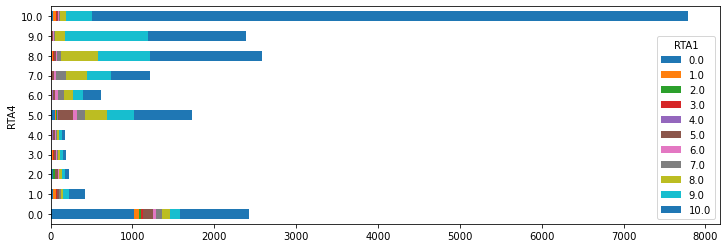

In [75]:
plot=pd.crosstab(index=dfcf['RTA4'], columns=dfcf['RTA1']).plot(kind='barh', stacked=True)

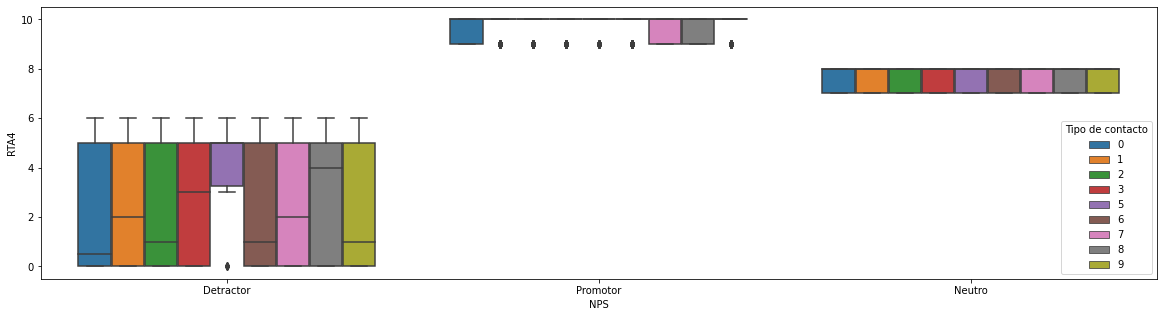

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='NPS',y='RTA4', data=dfcf[dfcf['MES']<10], hue='Tipo de contacto')
plt.show()

In [77]:
dfmotivoffnorm=dfmotivoff[dfmotivoff['MES']<10]
crosstabtipocontacto=pd.crosstab(index=[dfmotivoffnorm['NPS'],dfmotivoffnorm['Tipo de contacto']], columns=dfmotivoffnorm['RTA4'])
crosstabtipocontacto
cm=sns.light_palette("blue", as_cmap=True)
crosstabtipocontacto.style.background_gradient(cmap=cm)

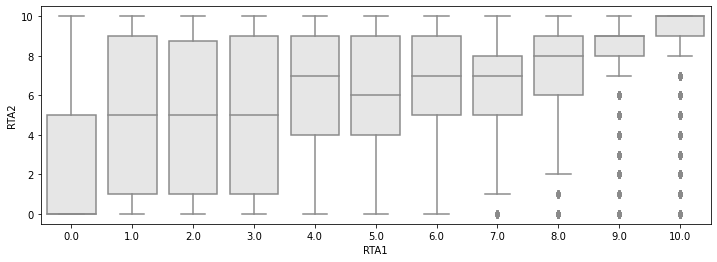

In [78]:
ax=sns.boxplot(y='RTA2', x='RTA1', data=dfcf, color='0.9')

<AxesSubplot:xlabel='MES', ylabel='RTA4'>

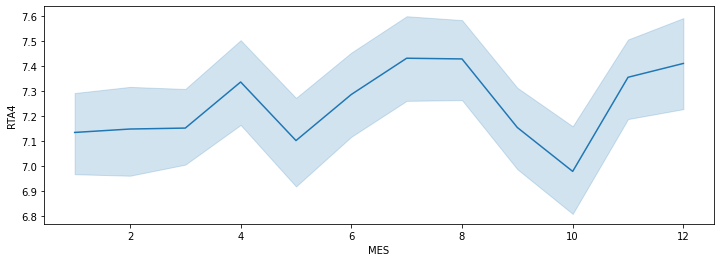

In [79]:
sns.lineplot(dfcf['MES'],dfcf['RTA4'])

ax=sns.catplot(x=df_cleanf['Tipo de contacto'], kind='count', data=df_cleanf)

In [80]:
dfcf['RTA4'].value_counts()

10.0    7790
8.0     2578
0.0     2418
9.0     2393
5.0     1733
7.0     1214
6.0      610
1.0      421
2.0      225
3.0      194
4.0      182
Name: RTA4, dtype: int64

In [81]:
dfcf['NPS'].value_counts()

Promotor     10183
Detractor     5783
Neutro        3792
Name: NPS, dtype: int64

## DNI repetidos en el NPS 2021

In [82]:
dfcf['DNI'].value_counts().head(15)

16211565    27
12546956    25
15427718    22
17749393    14
23378125    14
19528854    14
17999288    14
41460564    13
17392744    12
32609611    12
19990935    12
21485169    12
21745071    11
25799383    10
6908886     10
Name: DNI, dtype: int64

In [83]:
filtroDNI=dfcf[dfcf['DNI']=='14976998']
filtroDNI.shape

(0, 30)

In [85]:
#filtroDNI.to_excel(r'C:\Vision\DNIrepetido.xlsx', index = False)

In [86]:
print(dfcf.groupby('DNI'))


In [87]:
crosstab6=pd.crosstab(index=dfcf['DNI'], columns=dfcf['MES'], )
crosstab6

MES,1,2,3,4,5,6,7,8,9,10,11,12
DNI,,,,,,,,,,,,
10023770,0,0,0,0,0,0,0,0,1,0,0,0
10025469,0,0,0,0,0,0,0,0,0,0,0,1
100462322,0,0,0,0,0,0,0,0,0,1,0,0
100478894,0,0,0,0,0,1,0,0,0,0,0,0
100509900,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9887180,0,0,0,0,0,0,0,1,0,0,0,0
9935146,0,0,0,4,0,0,0,0,0,0,0,0
9940859,0,0,0,0,0,0,0,2,0,0,0,0


In [88]:
crosstabdnimes=pd.crosstab(index=dfcf['DNI'], columns=dfcf['MES'])
crosstabdnimes.head()

MES,1,2,3,4,5,6,7,8,9,10,11,12
DNI,,,,,,,,,,,,
10023770,0,0,0,0,0,0,0,0,1,0,0,0
10025469,0,0,0,0,0,0,0,0,0,0,0,1
100462322,0,0,0,0,0,0,0,0,0,1,0,0
100478894,0,0,0,0,0,1,0,0,0,0,0,0
100509900,0,1,0,0,0,0,0,0,0,0,0,0


In [89]:
pivotdni=pd.pivot_table(dfcf, values='RTA4', index='DNI', columns='MES', aggfunc='count',fill_value=0, margins=True, margins_name='All')
pivotdni.head()

MES,1,2,3,4,5,6,7,8,9,10,11,12,All
DNI,,,,,,,,,,,,,
10023770,0,0,0,0,0,0,0,0,1,0,0,0,1
10025469,0,0,0,0,0,0,0,0,0,0,0,1,1
100462322,0,0,0,0,0,0,0,0,0,1,0,0,1
100478894,0,0,0,0,0,1,0,0,0,0,0,0,1
100509900,0,1,0,0,0,0,0,0,0,0,0,0,1


### DNI repetidos en el NPS 2021

In [90]:
grouped=dfcf['NPS'].groupby(dfcf['DNI'])
grouped
grouped.count()

DNI
10023770     1
10025469     1
100462322    1
100478894    1
100509900    1
            ..
9887180      1
9935146      4
9940859      2
9959724      1
9960371      1
Name: NPS, Length: 15285, dtype: int64

In [91]:
DNIGrouped=pd.DataFrame(grouped.count())
DNIGrouped.head()

,NPS
DNI,
10023770,1
10025469,1
100462322,1
100478894,1
100509900,1


In [ ]:
#CantDNI=DNIGrouped.sort_values('RTA4',ascending=False)
#CantDNI

#### Clientes que participan más de 10 veces en el NPS telefónico

In [ ]:
#filtro1=CantDNI['RTA4']>10
#CantDNI[filtro1]

In [93]:
a=pd.pivot_table(dfcf, values='NPS', index='DNI', columns='RTA4', aggfunc='count', fill_value=0, margins=True, margins_name='All')
a.head(5)

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
DNI,,,,,,,,,,,,
10023770,0,0,0,0,0,0,0,0,0,0,1,1
10025469,0,0,0,0,0,0,0,0,0,0,1,1
100462322,0,0,0,0,0,0,0,0,0,1,0,1
100478894,1,0,0,0,0,0,0,0,0,0,0,1
100509900,0,0,0,0,0,0,0,0,0,0,1,1


In [94]:
a.sort_values('All',ascending=False).head(15)

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
DNI,,,,,,,,,,,,
All,2418,421,225,194,182,1733,610,1214,2578,2393,7790,19758
16211565,6,0,0,0,0,0,0,0,0,0,21,27
12546956,1,0,1,0,1,1,5,7,8,1,0,25
15427718,0,1,0,0,1,0,0,8,3,9,0,22
17749393,0,0,0,0,0,0,0,0,0,1,13,14
19528854,7,0,3,1,1,2,0,0,0,0,0,14
23378125,0,0,3,0,0,3,0,3,2,3,0,14
17999288,2,1,1,0,1,0,0,3,1,1,4,14
41460564,5,0,0,4,0,1,1,0,1,0,1,13


In [95]:
filtro1=a.All >= 8
a[filtro1]

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
DNI,,,,,,,,,,,,
11322115,1,0,0,0,1,1,0,0,0,0,5,8
12546956,1,0,1,0,1,1,5,7,8,1,0,25
13502084,0,0,2,0,0,3,0,2,0,1,0,8
14517626,1,0,0,0,0,0,2,0,4,0,2,9
15028769,0,0,0,0,0,0,0,0,0,0,9,9
15228604,7,0,2,0,0,0,0,0,0,0,0,9
15427718,0,1,0,0,1,0,0,8,3,9,0,22
15555705,4,0,0,0,0,2,0,0,1,1,1,9
15672764,0,0,0,0,0,0,0,0,0,0,8,8


In [96]:
filtro1=dfcf['DNI'].value_counts()
filtro1

16211565    27
12546956    25
15427718    22
17749393    14
23378125    14
            ..
32694604     1
32970076     1
22097334     1
15813515     1
28630078     1
Name: DNI, Length: 15285, dtype: int64

In [97]:
promotores=dfcf['RTA4']>8
detractores=dfcf['RTA4']<7
repetidos=dfcf['DNI'].value_counts()>10

## Repetidos en distintos meses

In [98]:
d=pd.pivot_table(dfcf, values='NPS', index='DNI', columns='MES', aggfunc='count', fill_value=0, margins=True, margins_name='All')
d.sort_values('All',ascending=False).head(20)

MES,1,2,3,4,5,6,7,8,9,10,11,12,All
DNI,,,,,,,,,,,,,
All,1614,1486,1980,1679,1529,1688,1516,1729,1784,1667,1666,1420,19758
16211565,2,5,0,1,1,5,2,1,2,1,6,1,27
12546956,0,0,0,5,2,0,0,3,0,1,11,3,25
15427718,1,1,1,0,1,5,4,2,2,1,4,0,22
17749393,0,0,1,0,1,0,2,3,1,6,0,0,14
19528854,0,0,3,6,5,0,0,0,0,0,0,0,14
23378125,0,0,0,0,2,2,1,5,4,0,0,0,14
17999288,0,0,0,0,0,0,2,3,9,0,0,0,14
41460564,1,5,5,0,0,2,0,0,0,0,0,0,13


## Definimos el dataset de solo Promotores

In [99]:
dfcfpromo=dfcf[promotores]
dfcfpromo.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
16,04/01/2021,09:00:33,1738.0,14225547,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
18,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
27,04/01/2021,09:00:33,1780.0,41460564,10.0,10.0,1.0,10.0,NaN,SOCIO 5,...,NaN,NaN,CUSTOMER,BANCA/DIGITAL,40225997,1,4.0,False,1,1
46,04/01/2021,09:00:33,1743.0,23172129,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
48,04/01/2021,09:00:33,5684.0,25050346,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1


#### Estos clientes participaron varias veces en el NPS 2021, y siempre fueron promotores

In [100]:
b=pd.pivot_table(dfcfpromo, values='NPS', index='DNI', columns='RTA4', aggfunc='count', fill_value=0, margins=True, margins_name='All')
b.sort_values('All',ascending=False).head(20)

RTA4,9.0,10.0,All
DNI,,,
All,2393,7790,10183
16211565,0,21,21
17749393,1,13,14
19990935,0,12,12
21485169,0,11,11
25799383,0,9,9
15028769,0,9,9
15427718,9,0,9
7487634,1,8,9


## Definimos el dataset de Detractores

In [101]:
dfcfdet=dfcf[detractores]
dfcfdet.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,C,R,SEGMENTO,CIRC,BAJAS,MES NPS,MES BAJA,NPS > BAJA,TOTALIDAD DE RESPUESTAS,ALGUNA RESPUESTA
15,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,Cancelación,Cancelación,CUSTOMER,NaN,10855532,1,1.0,True,1,1
17,04/01/2021,09:00:33,1737.0,27387328,10.0,10.0,2.0,0.0,NaN,SOCIO 8,...,NaN,Retención,CUSTOMER,NaN,NaN,1,NaN,False,1,1
52,04/01/2021,09:00:33,1747.0,94348326,9.0,9.0,1.0,6.0,NaN,SOCIO 6,...,Cancelación,Cancelación,CUSTOMER,SUPERMERCADO,NaN,1,NaN,False,1,1
99,04/01/2021,09:00:33,5798.0,95169674,10.0,10.0,1.0,5.0,NaN,SOCIO 7,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1
143,04/01/2021,09:00:33,2039.0,13052258,5.0,3.0,2.0,4.0,NaN,SOCIO 7,...,0,NaN,CUSTOMER,NaN,NaN,1,NaN,False,1,1


In [102]:
c=pd.pivot_table(dfcfdet, values='NPS', index='DNI', columns='RTA4', aggfunc='count', fill_value=0, margins=True, margins_name='All')
c.sort_values('All',ascending=False).head(20)

RTA4,0.0,1.0,2.0,3.0,4.0,5.0,6.0,All
DNI,,,,,,,,
All,2418,421,225,194,182,1733,610,5783
19528854,7,0,3,1,1,2,0,14
41460564,5,0,0,4,0,1,1,11
15228604,7,0,2,0,0,0,0,9
32609611,0,1,2,1,2,3,0,9
12546956,1,0,1,0,1,1,5,9
35252350,3,0,0,0,0,3,1,7
13303450,6,0,0,1,0,0,0,7
19095831,4,0,0,0,0,3,0,7


#### Estos clientes participaron varias veces en el NPS 2021, y siempre fueron detractores

### Sabiendo que hay clientes que consistentemente son promotores, o por el contrario son detractores; se deberían hacer acciones orientadas a:
- Con los promotores: asegurar su lealtad.
- Con los detractores: entender qué debe mejorar la empresa para que pasen a neutros o promotores.

variables=['RTA1','RTA2','RTA3','RTA4']
columns=4
fig, axes = plt.subplots(len(variables) // columns, columns, figsize=(15,8))

for current_idx, variable in enumerate (variables):
    i= current_idx // columns
    j= current_idx % columns
    sns.distplot(df_cleanf[variable], ax=axes[i][j])
    axes[i]

In [103]:
#d=sns.light_palette("Blue", as_cmap=True)
#c1.style.background_gradient(cmap=d)

In [104]:
pd.crosstab(dfcf['DNI'],[dfcf['MES'],dfcf['RTA4']],margins=True, margins_name='All').sort_values('All',ascending=False).head(20)

MES         1                                          ...  12               \
RTA4      0.0 1.0 2.0 3.0 4.0  5.0 6.0  7.0  8.0  9.0  ... 2.0 3.0 4.0  5.0   
DNI                                                    ...                    
All       210  40  19   6  13  155  41  123  201  182  ...  14  14  15  127   
16211565    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
12546956    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
15427718    0   0   0   0   0    0   0    0    0    1  ...   0   0   0    0   
17749393    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
19528854    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
23378125    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
17999288    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
41460564    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
17392744    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
32609611    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
19990935    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
21485169    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
21745071    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
25799383    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
7487634     0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
18957885    0   0   0   0   0    0   0    0    1    4  ...   0   0   0    0   
6908886     0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
14517626    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   
27129692    0   0   0   0   0    0   0    0    0    0  ...   0   0   0    0   

MES                                All  
RTA4     6.0 7.0  8.0  9.0 10.0         
DNI                                     
All       39  86  199  186  563  19758  
16211565   0   0    0    0    1     27  
12546956   1   1    1    0    0     25  
15427718   0   0    0    0    0     22  
17749393   0   0    0    0    0     14  
19528854   0   0    0    0    0     14  
23378125   0   0    0    0    0     14  
17999288   0   0    0    0    0     14  
41460564   0   0    0    0    0     13  
17392744   0   0    0    0    0     12  
32609611   0   0    0    0    0     12  
19990935   0   0    0    0    0     12  
21485169   0   0    0    0    0     12  
21745071   0   0    0    0    0     11  
25799383   0   0    0    0    3     10  
7487634    0   0    0    0    0     10  
18957885   0   0    0    0    0     10  
6908886    0   0    0    0    0     10  
14517626   0   0    0    0    0      9  
27129692   0   0    0    0    0      9  

[20 rows x 133 columns]

In [105]:
pd.crosstab(dfcf['DNI'],[dfcf['MES'],dfcf['RTA4']],margins=True, margins_name='All').sort_values('All',ascending=False).head(20).to_excel('ver.xlsx')

## Combinar con información de Bajas 2021

In [122]:
bajas=pd.read_excel('C:/Users/vitto/Bajas 2021.xlsx')
bajas.head()

,FECHABAJA,CONTRATO,EMISION,CERTIFICADO,PERIODO,SOCIO,CANAL,PROD,DNI ASEGURADO,MES
0,01-JAN-21,5317382,24244244,IO71167381,11,SOCIO\n2\n,4,935,17765301,1
1,01-JAN-21,5318285,24244245,IE5138119,10,SOCIO\n3\n,1,621,35301540,1
2,01-JAN-21,5318712,24244246,CRS1111182,11,SOCIO\n1,4,944,93720254,1
3,01-JAN-21,8555841,24194643,IO71111974,19,SOCIO\n2\n,4,935,14389403,1
4,01-JAN-21,5318868,24244246,CRS1111178,11,SOCIO\n1\n,4,944,14196639,1


In [123]:
bajas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185111 entries, 0 to 185110
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   FECHABAJA      185111 non-null  object
 1   CONTRATO       185111 non-null  int64 
 2   EMISION        185111 non-null  int64 
 3   CERTIFICADO    185111 non-null  object
 4   PERIODO        185111 non-null  int64 
 5   SOCIO          185111 non-null  object
 6   CANAL          185111 non-null  object
 7   PROD           185111 non-null  int64 
 8   DNI ASEGURADO  185111 non-null  object
 9   MES            185111 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 14.1+ MB


In [124]:
bajas['DNI ASEGURADO']=bajas['DNI ASEGURADO'].astype(str)

In [125]:
bajas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185111 entries, 0 to 185110
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   FECHABAJA      185111 non-null  object
 1   CONTRATO       185111 non-null  int64 
 2   EMISION        185111 non-null  int64 
 3   CERTIFICADO    185111 non-null  object
 4   PERIODO        185111 non-null  int64 
 5   SOCIO          185111 non-null  object
 6   CANAL          185111 non-null  object
 7   PROD           185111 non-null  int64 
 8   DNI ASEGURADO  185111 non-null  object
 9   MES            185111 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 14.1+ MB


In [126]:
bajas.shape

(185111, 10)

In [127]:
join=dfmotivoff.merge(bajas, left_on='DNI ASEGURADO', right_on='DNI ASEGURADO')
join.head(5)

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,ALGUNA RESPUESTA,FECHABAJA,CONTRATO,EMISION,CERTIFICADO,PERIODO,SOCIO,CANAL,PROD,MES_y
0,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,1,04-JAN-21,10061527,24241419,IO71184193,2,SOCIO\n2\n,4,935,1
1,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,1,04-JAN-21,10061527,24241419,IO71184193,2,SOCIO\n2\n,4,935,1
2,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,1,04-JAN-21,10052168,24241428,IO71185152,2,SOCIO\n2\n,4,935,1
3,04/01/2021,09:00:33,1738.0,95924480,7.0,10.0,2.0,8.0,NaN,SOCIO 5,...,1,2021-06-24 00:00:00,5254685513,24214625,1171111881,0,SOCIO\n11\n,4,9717,6
4,07/01/2021,09:00:33,1738.0,95924480,0.0,8.0,2.0,0.0,NaN,SOCIO 5,...,1,2021-06-24 00:00:00,5254685513,24214625,1171111881,0,SOCIO\n11\n,4,9717,6


In [128]:
joinbaja=join[join['MES NPS'] <= join['MES BAJA']]
joinbaja.head()

,Fecha,hora,ID Asesor,DNI ASEGURADO,RTA1,RTA2,RTA3,RTA4,RTA5,DNIS/COLA,...,ALGUNA RESPUESTA,FECHABAJA,CONTRATO,EMISION,CERTIFICADO,PERIODO,SOCIO,CANAL,PROD,MES_y
0,04/01/2021,09:00:33,1744.0,12090099,0.0,0.0,2.0,0.0,NaN,SOCIO 8,...,1,04-JAN-21,10061527,24241419,IO71184193,2,SOCIO\n2\n,4,935,1
1,04/01/2021,09:00:33,1746.0,12090099,10.0,10.0,1.0,10.0,NaN,SOCIO 8,...,1,04-JAN-21,10061527,24241419,IO71184193,2,SOCIO\n2\n,4,935,1
2,04/01/2021,09:00:33,3437.0,39508354,8.0,9.0,1.0,7.0,NaN,SOCIO 5,...,1,04-JAN-21,10052168,24241428,IO71185152,2,SOCIO\n2\n,4,935,1
3,04/01/2021,09:00:33,1738.0,95924480,7.0,10.0,2.0,8.0,NaN,SOCIO 5,...,1,2021-06-24 00:00:00,5254685513,24214625,1171111881,0,SOCIO\n11\n,4,9717,6
4,07/01/2021,09:00:33,1738.0,95924480,0.0,8.0,2.0,0.0,NaN,SOCIO 5,...,1,2021-06-24 00:00:00,5254685513,24214625,1171111881,0,SOCIO\n11\n,4,9717,6


In [129]:
joinbaja.shape

(6001, 39)

In [130]:
cm=sns.light_palette("blue", as_cmap=True)
pd.crosstab(joinbaja['MES NPS'], joinbaja['MES BAJA']).style.background_gradient(cmap=cm)

MES BAJA,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
MES NPS,,,,,,,,,,,,
1,411,34,23,30,10,24,19,7,4,2,2,0
2,0,402,72,39,22,23,15,12,4,3,1,0
3,0,0,514,88,37,40,26,14,6,12,2,0
4,0,0,0,460,66,60,25,24,13,15,2,0
5,0,0,0,0,370,91,19,17,10,11,0,0
6,0,0,0,0,0,514,66,21,28,12,0,0
7,0,0,0,0,0,0,418,35,17,12,5,0
8,0,0,0,0,0,0,0,447,65,26,1,0
9,0,0,0,0,0,0,0,0,607,73,7,0


In [131]:
print(joinbaja.loc[:,['MES NPS','MES BAJA']])

      MES NPS  MES BAJA
0           1       1.0
1           1       1.0
2           1       1.0
3           1       6.0
4           1       6.0
...       ...       ...
6890       11      12.0
6891       11      12.0
6904       11      11.0
6905       11      11.0
6906       11      11.0

[6001 rows x 2 columns]


In [132]:
joinbaja['Dif_Meses']=joinbaja['MES BAJA']-joinbaja['MES NPS']
BajaSimultaneaNPS=joinbaja[joinbaja['Dif_Meses']==0]
BajaSimultaneaNPS.loc[:,['RTA4','MES NPS', 'MES BAJA', 'Dif_Meses', 'Tipo de contacto', 'Motivo Gen.']]

,RTA4,MES NPS,MES BAJA,Dif_Meses,Tipo de contacto,Motivo Gen.
0,0.0,1,1.0,0.0,8,6
1,10.0,1,1.0,0.0,8,6
2,7.0,1,1.0,0.0,8,6
23,7.0,1,1.0,0.0,8,6
24,10.0,1,1.0,0.0,6,67
...,...,...,...,...,...,...
6877,0.0,11,11.0,0.0,8,6
6878,9.0,11,11.0,0.0,8,6
6904,0.0,11,11.0,0.0,8,6
6905,0.0,11,11.0,0.0,8,6


In [133]:
filtro1=joinbaja['Dif_Meses']==0 
filtro2=joinbaja['Motivo Gen.']=='Bajas'
BajaSimultaneaNPSMotBaja=joinbaja[filtro1 & filtro2]
BajaSimultaneaNPSMotBaja.loc[:,['RTA4','MES NPS', 'MES BAJA', 'Dif_Meses', 'Tipo de contacto', 'Motivo Gen.']]

,RTA4,MES NPS,MES BAJA,Dif_Meses,Tipo de contacto,Motivo Gen.


In [134]:
filtro3= joinbaja['Motivo']=='Motivos Economicos'
BajaSimultaneaNPSMotBajaEcon=joinbaja[filtro1 & filtro2 & filtro3]
BajaSimultaneaNPSMotBajaEcon.loc[:,['RTA4','MES NPS', 'MES BAJA', 'Dif_Meses', 'Tipo de contacto', 'Motivo Gen.', 'Motivo']]

,RTA4,MES NPS,MES BAJA,Dif_Meses,Tipo de contacto,Motivo Gen.,Motivo


In [135]:
BajaLuegoNPS=joinbaja[joinbaja['Dif_Meses']>0]
BajaLuegoNPS.loc[:,['RTA4','MES NPS', 'MES BAJA', 'Dif_Meses', 'Tipo de contacto', 'Motivo Gen.']]

,RTA4,MES NPS,MES BAJA,Dif_Meses,Tipo de contacto,Motivo Gen.
3,8.0,1,6.0,5.0,2,64
4,0.0,1,6.0,5.0,2,64
5,8.0,1,6.0,5.0,2,10
6,0.0,3,6.0,3.0,2,64
7,0.0,3,6.0,3.0,6,63
...,...,...,...,...,...,...
6887,9.0,11,12.0,1.0,6,67
6888,9.0,11,12.0,1.0,6,67
6889,9.0,11,12.0,1.0,6,67
6890,9.0,11,12.0,1.0,6,67


COLUMN: Tipo de contacto


a. Quantity and Percentage 



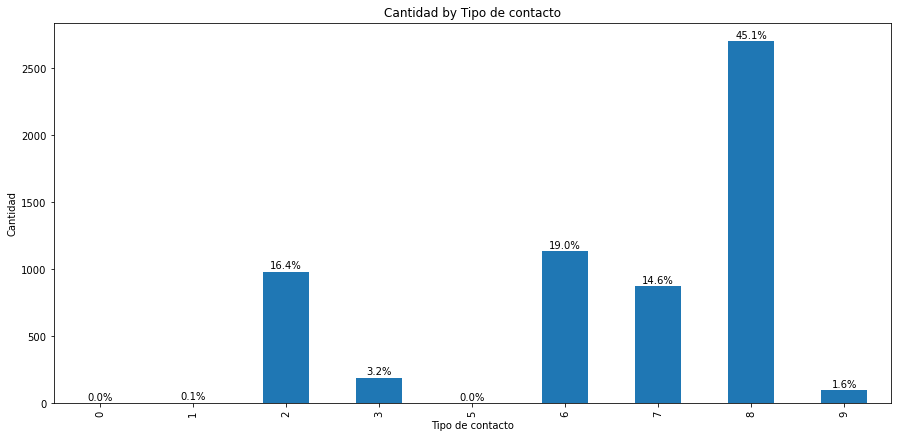

In [136]:
column_exploration(joinbaja,'Tipo de contacto', True)

La mayoría de clientes que se dan de baja, lo hacen luego de llamar por una solicitud

COLUMN: Motivo Gen.


a. Quantity and Percentage 



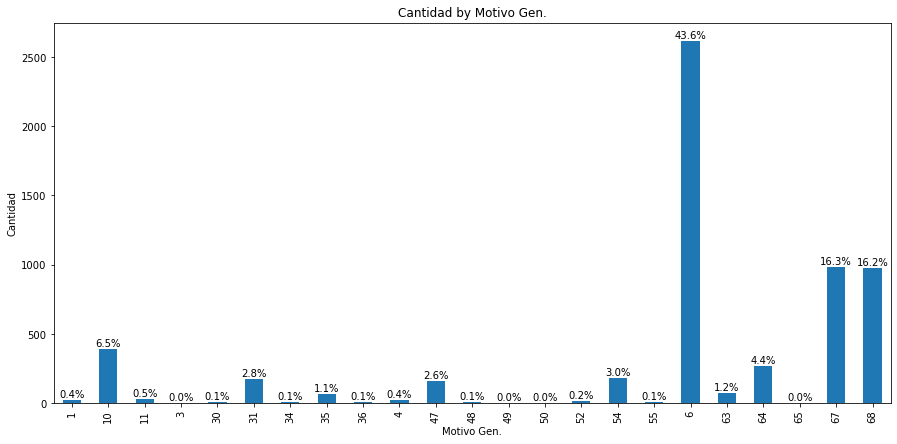

In [137]:
column_exploration(joinbaja,'Motivo Gen.', True)

Como es de esperar, la mayoría de casos son clientes que llamaron para darse de baja. Pero que pasa con los clientes que llaman por otro motivo? Por qué se dan de baja?

In [138]:
pd.crosstab(joinbaja['Motivo Gen.'],joinbaja['NPS'],margins=True, margins_name='All').sort_values('All',ascending=False).head(20)

NPS,Detractor,Neutro,Promotor,All
Motivo Gen.,,,,
All,2096,1155,2750,6001
6,762,565,1291,2618
67,417,201,363,981
68,319,168,488,975
10,171,62,160,393
64,109,38,118,265
54,36,32,114,182
31,89,26,56,171
47,65,24,68,157


In [139]:
pd.crosstab([joinbaja['Motivo Gen.'],joinbaja['Motivo']],joinbaja['NPS'],margins=True, margins_name='All').sort_values('Motivo Gen.',ascending=True).head(20)

NPS                 Detractor  Neutro  Promotor  All
Motivo Gen. Motivo                                  
1           1               3       4         4   11
            109             2       0         1    3
            146             1       0         4    5
            25              0       0         3    3
10          39             19       6         9   34
            43             30      12        35   77
            59            122      42       112  276
            87              0       2         3    5
            9               0       0         1    1
11          66              2       3         1    6
            65              1       3         5    9
            55             11       0         4   15
3           6               1       1         0    2
30          104             1       0         0    1
            105             1       0         0    1
            106             1       2         1    4
31          31             89      26        56  171
34          125             1       0         0    1
            48              0       0         4    4
35          62             31      13        23   67

In [140]:
pd.crosstab(joinbaja['Tipo de contacto'],joinbaja['NPS'],margins=True, margins_name='All', normalize='columns').sort_values('All',ascending=False).head(20)

NPS,Detractor,Neutro,Promotor,All
Tipo de contacto,,,,
8,0.381202,0.504762,0.481091,0.450758
6,0.245229,0.191342,0.146545,0.189635
2,0.203244,0.130736,0.147273,0.163639
7,0.128817,0.140260,0.161818,0.146142
3,0.017176,0.027706,0.044727,0.031828
9,0.023378,0.005195,0.015636,0.016331
1,0.000954,0.000000,0.001455,0.001000
5,0.000000,0.000000,0.001091,0.000500
0,0.000000,0.000000,0.000364,0.000167


In [ ]:
# La mayoría de los clientes que se dan de baja, 

In [141]:
pd.crosstab(joinbaja['Motivo Gen.'],joinbaja['NPS'],margins=True, margins_name='All').sort_values('All',ascending=False).head(20)

NPS,Detractor,Neutro,Promotor,All
Motivo Gen.,,,,
All,2096,1155,2750,6001
6,762,565,1291,2618
67,417,201,363,981
68,319,168,488,975
10,171,62,160,393
64,109,38,118,265
54,36,32,114,182
31,89,26,56,171
47,65,24,68,157


In [142]:
pd.crosstab(joinbaja['Motivo Gen.'],joinbaja['NPS'],margins=True, margins_name='All',normalize='columns').sort_values('All',ascending=False).head(20)

NPS,Detractor,Neutro,Promotor,All
Motivo Gen.,,,,
6,0.363550,0.489177,0.469455,0.436261
67,0.198950,0.174026,0.132000,0.163473
68,0.152195,0.145455,0.177455,0.162473
10,0.081584,0.053680,0.058182,0.065489
64,0.052004,0.032900,0.042909,0.044159
54,0.017176,0.027706,0.041455,0.030328
31,0.042462,0.022511,0.020364,0.028495
47,0.031011,0.020779,0.024727,0.026162
63,0.023378,0.005195,0.005455,0.011665


# Clustering

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [144]:
X = np.array(dfcf[["RTA1","RTA4","Tipo de contacto"]])
y = np.array(dfcf['NPS'])
X.shape

(19758, 3)

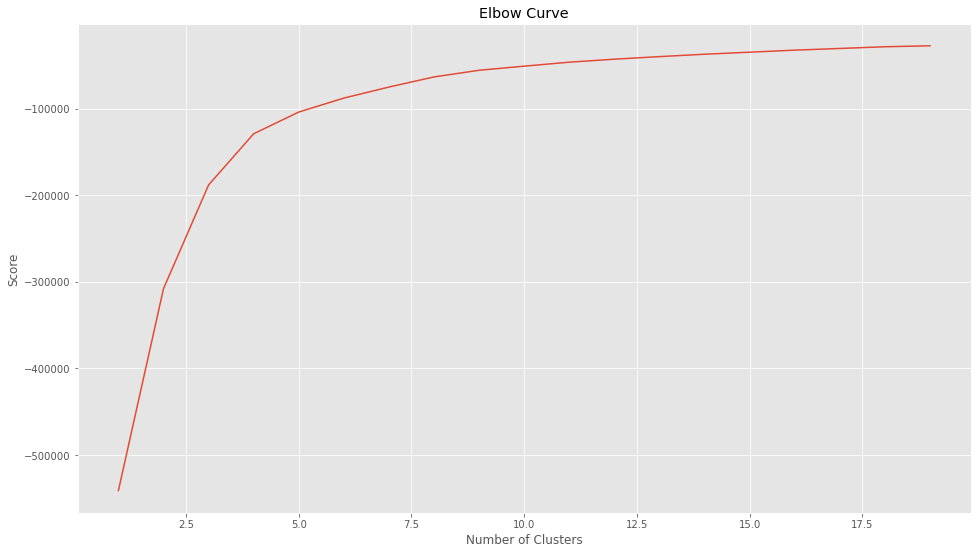

In [145]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Según el método del codo, definimos que los grupos serán 5 (K=5)

In [146]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.57979481 9.23710459 2.14120832]
 [8.72399329 2.96644295 7.39597315]
 [0.39606557 1.00196721 5.07278689]
 [8.47310584 3.0242915  2.02371313]
 [9.57687975 9.06927626 7.62996339]]


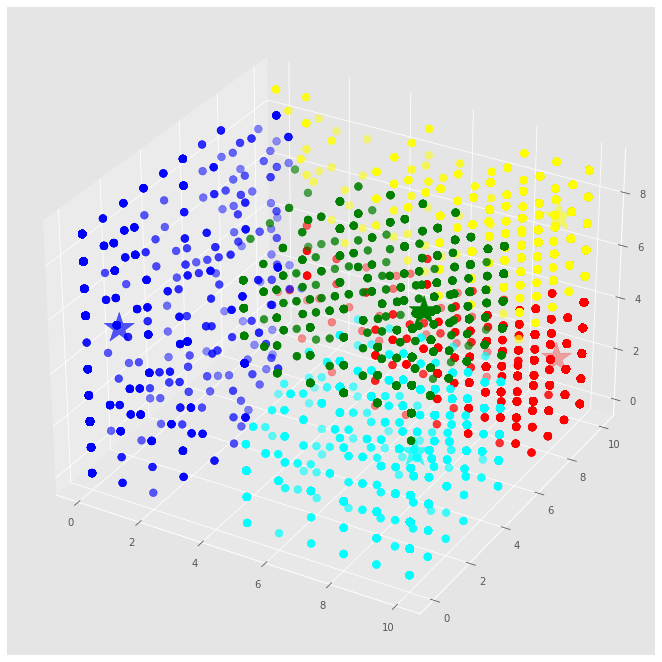

In [147]:
labels = kmeans.predict(X)
# Centroides
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

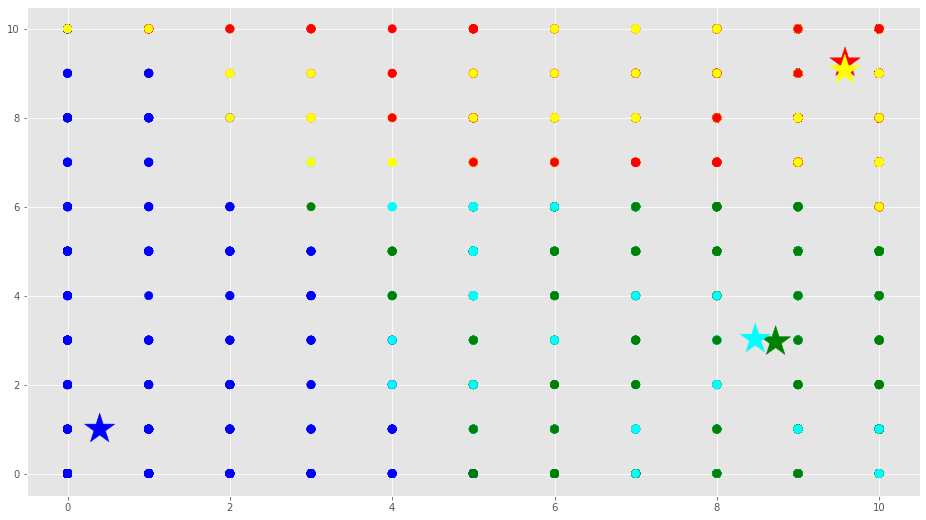

In [148]:
f1 = dfcf['RTA1'].values
f2 = dfcf['RTA4'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

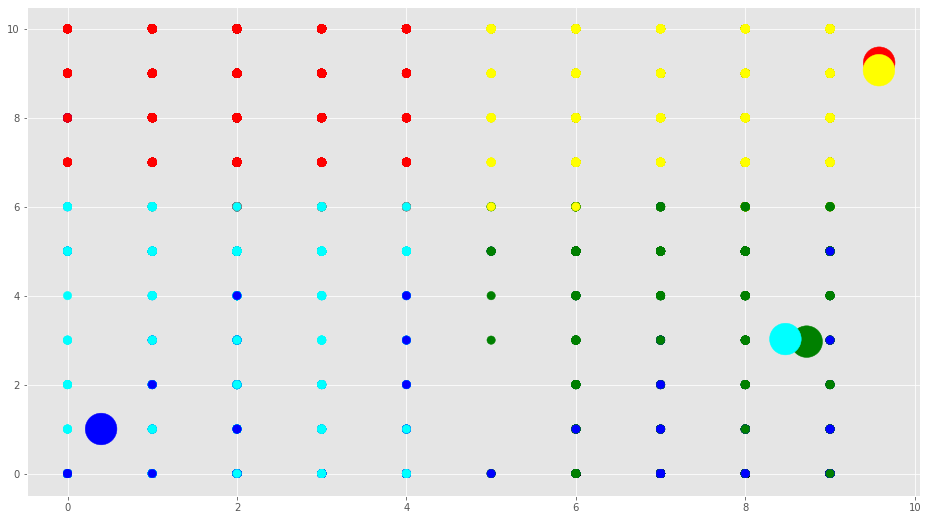

In [149]:
f1 = dfcf['Tipo de contacto'].values
f2 = dfcf['RTA4'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1],c=colores, s=1000)
plt.show()

In [151]:
copy =  pd.DataFrame()
copy['RTA4']=dfcf['RTA4'].values
copy['RTA1']=dfcf['RTA1'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,7018
1,green,2383
2,blue,1525
3,cyan,1729
4,yellow,7103
